In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [95]:
bank_data = pd.read_csv('bank_data.csv')

In [96]:
bank_data.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


1).Explore the general characteristics of the data as a whole: 
examine the means, standard deviations, and other statistics associated with the numerical attributes; 
show the distributions of values associated with categorical attributes; etc.

In [97]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
id              600 non-null object
age             600 non-null int64
income          600 non-null float64
children        600 non-null int64
gender          600 non-null object
region          600 non-null object
married         600 non-null object
car             600 non-null object
savings_acct    600 non-null object
current_acct    600 non-null object
mortgage        600 non-null object
pep             600 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


In [98]:
bank_data.columns

Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'],
      dtype='object')

In [99]:
bank_data.dtypes

id               object
age               int64
income          float64
children          int64
gender           object
region           object
married          object
car              object
savings_acct     object
current_acct     object
mortgage         object
pep              object
dtype: object

In [100]:
bank_data.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In the above table we can see the general characteristics of the data such as means,median, standard deviations, and other statistics associated with the numerical attributes.Below is the examination of the distributions of the categorical variables. The values, distribution, and dispersion of categorical variables are best analyzed with bar plots , that's why I will utilize bar plots. 

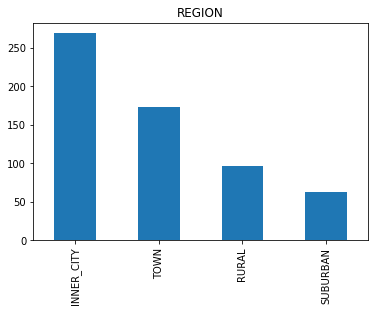

In [101]:
bank_data['region'].value_counts().plot(kind='bar', title="REGION")

In [102]:
bank_data.groupby("region").mean()

,age,income,children
region,,,
INNER_CITY,41.992565,26843.999963,0.951673
RURAL,43.010417,30027.605417,1.229167
SUBURBAN,43.725806,28656.356935,0.967742
TOWN,42.202312,26786.349653,1.000000


When we look at the Age, the inner city people has the lowest mean and the suburban people have the highest mean and we can assume that younger age group of people prefer inner cities and older group of people prefer suburban, rural areas. 

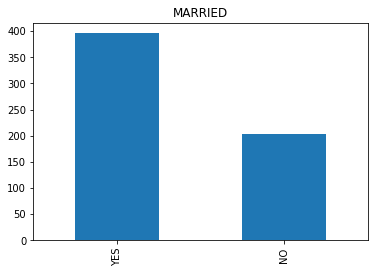

In [103]:
bank_data["married"].value_counts().plot(kind="bar", title="MARRIED")


In [104]:
bank_data.groupby("married").mean()

,age,income,children
married,,,
NO,42.186275,27674.627108,1.083333
YES,42.502525,27446.451515,0.974747


I cannot see a significant difference between married and non-married people when comparing the age groups. 

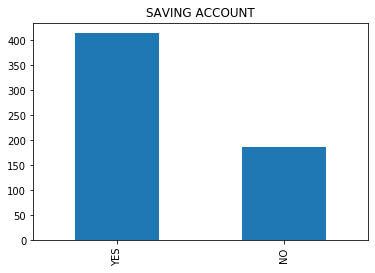

In [105]:
bank_data["savings_acct"].value_counts().plot(kind="bar", title="SAVING ACCOUNT")

In [106]:
bank_data.groupby("savings_acct").mean()

,age,income,children
savings_acct,,,
NO,38.430108,22405.999194,0.946237
YES,44.176329,29823.436908,1.041063


The results show that people who has higher income and older are more likely to have savings

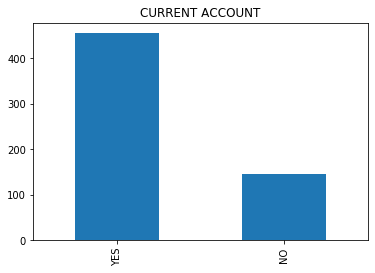

In [107]:
bank_data["current_acct"].value_counts().plot(kind="bar", title = "CURRENT ACCOUNT")


In [108]:
bank_data.groupby("current_acct").mean()

,age,income,children
current_acct,,,
NO,43.296552,26802.195655,1.000000
YES,42.107692,27754.066725,1.015385


I am not seeing a significant difference between people with or without a current account. 

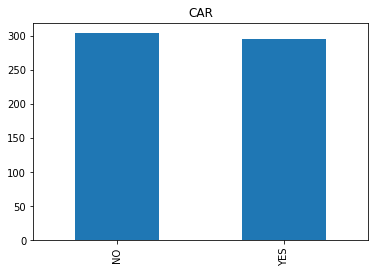

In [109]:
bank_data["car"].value_counts().plot(kind="bar", title = "CAR")


In [110]:
bank_data.groupby("car").mean()


,age,income,children
car,,,
NO,41.289474,26486.807336,0.973684
YES,43.530405,28589.288176,1.050676


The results indicate that people who owns car have higher income, more likely to have children and the mean for age is higher compared to the people who do not own car. 

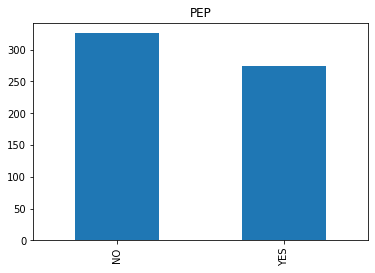

In [111]:
bank_data["pep"].value_counts().plot(kind="bar", title = "PEP")


In [112]:
bank_data.groupby("pep").mean()


,age,income,children
pep,,,
NO,40.098160,24900.953374,1.067485
YES,45.127737,30644.919453,0.945255


People with higher income and that are older are more likely to purchase PEP. 

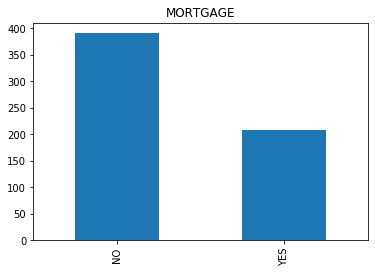

In [113]:
bank_data["mortgage"].value_counts().plot(kind="bar", title = "MORTGAGE")


In [114]:
bank_data.groupby("mortgage").mean()

,age,income,children
mortgage,,,
NO,42.565217,27662.194680,1.069054
YES,42.076555,27265.553158,0.904306


There is not a significant difference between the mean of age and income of people with and without mortgage. 

2). Suppose that the hypothetical bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations.

In [115]:
yes_pep = bank_data[bank_data.pep=="YES"]
no_pep = bank_data[bank_data.pep=="NO"]

In [116]:
yes_pep.describe()

,age,income,children
count,274.000000,274.000000,274.000000
mean,45.127737,30644.919453,0.945255
std,14.327991,13609.613043,0.860571
min,18.000000,7756.360000,0.000000
25%,34.000000,19639.475000,0.000000
50%,45.000000,28080.050000,1.000000
75%,58.000000,38458.350000,1.000000
max,67.000000,63130.100000,3.000000


In [117]:
no_pep.describe()

,age,income,children
count,326.000000,326.000000,326.000000
mean,40.098160,24900.953374,1.067485
std,14.123506,11661.123422,1.195524
min,18.000000,5014.210000,0.000000
25%,27.000000,15366.475000,0.000000
50%,40.000000,23105.000000,0.000000
75%,51.000000,31210.900000,2.000000
max,67.000000,61554.600000,3.000000


From the results above, we can make a few conclusions. For example people who purchased PEP have higher income.And, if we look at the average age of the group of people who purchased PEP, they are 5 years older than the people who did not purchase PEP. 

3). Use z-score normalization to standardize the values of the income attribute. Do not change the original income attribute in the table.

In [118]:
bank_data.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [119]:
income_norm = (bank_data["income"]-bank_data["income"].mean())/bank_data["income"].std()

In [120]:
income_norm.head()

0   -0.773523
1    0.198541
2   -0.848766
3   -0.554180
4    1.787071
Name: income, dtype: float64

In [121]:
income_norm.head(5)

0   -0.773523
1    0.198541
2   -0.848766
3   -0.554180
4    1.787071
Name: income, dtype: float64

4). Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). Do not change the original age attribute in the table.]

In [122]:
age_categories = pd.qcut(bank_data.age, 3, labels = ['young', 'mid-age', 'old']).value_counts()

In [123]:
age_categories

young      209
old        198
mid-age    193
Name: age, dtype: int64

In [124]:
age_categories = pd.qcut(bank_data.age, 3, labels = ['young', 'mid-age', 'old'], retbins = True)

In [129]:
age_categories

(0      mid-age
 1      mid-age
 2          old
 3        young
 4          old
         ...   
 595        old
 596      young
 597      young
 598      young
 599    mid-age
 Name: age, Length: 600, dtype: category
 Categories (3, object): [young < mid-age < old], array([18., 35., 49., 67.]))

5). Use Min-Max Normalization to transform the values of all numeric attributes (income, age, children) in the original table (before the transformations in parts 3 and 4 above) onto the range 0.0-1.0.

In [176]:
bank_data.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [177]:
bank_data[["age", "income", "children"]].head()  #filtered the numerical columns in order (age, income, children)

,age,income,children
0,48,17546.0,1
1,40,30085.1,3
2,51,16575.4,0
3,23,20375.4,3
4,57,50576.3,0


In [207]:
num_data=bank_data[["age", "income", "children"]]
num_data

,age,income,children
0,48,17546.00,1
1,40,30085.10,3
2,51,16575.40,0
3,23,20375.40,3
4,57,50576.30,0
...,...,...,...
595,61,47025.00,2
596,30,9672.25,0
597,31,15976.30,0
598,29,14711.80,0


In [208]:
cols_to_norm = num_data.apply(lambda x: (x - min(x)) / (max(x)-min(x))) #used this code to normalize numerical columns

In [209]:
cols_to_norm.describe() 

,age,income,children
count,600.000000,600.000000,600.000000
mean,0.497857,0.387326,0.337222
std,0.294387,0.221961,0.352251
min,0.000000,0.000000,0.000000
25%,0.244898,0.210791,0.000000
50%,0.489796,0.342610,0.333333
75%,0.760204,0.536144,0.666667
max,1.000000,1.000000,1.000000


6). Convert the table (after normalization in part 5) into the dummy variables. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes should remain unchanged. Save this new table into a file called bank_numeric.csv and submit it along with your assignment. Hint: you might consider using the get_dummies for Pandas data frames.

In [210]:
num_data = pd.get_dummies(bank_data)
num_data.head(n=5)

,age,income,children,id_ID12101,id_ID12102,id_ID12103,id_ID12104,id_ID12105,id_ID12106,id_ID12107,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
0,48,17546.0,1,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
1,40,30085.1,3,0,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,0
2,51,16575.4,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
3,23,20375.4,3,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,1,0
4,57,50576.3,0,0,0,0,0,1,0,0,...,1,0,0,1,1,0,1,0,1,0


In [211]:
num_data.to_csv('num_data.csv') # Wrote the data frame to csv file

7). Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. Discuss your results by indicating any significant positive or negative correlations
among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix. Hint: you can create the correlation matrix by using the corr() function in Pandas, try at least two corr methods and compare them].

In [215]:
num_data.corr()

,age,income,children,id_ID12101,id_ID12102,id_ID12103,id_ID12104,id_ID12105,id_ID12106,id_ID12107,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.752726,0.023572,0.015889,-0.006790,0.024394,-0.054982,0.041403,0.041403,-0.057817,...,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
income,0.752726,1.000000,0.036761,-0.031632,0.008119,-0.034709,-0.022662,0.073079,0.032797,-0.059113,...,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
children,0.023572,0.036761,1.000000,-0.000451,0.076942,-0.039148,0.076942,-0.039148,0.038245,-0.039148,...,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
id_ID12101,0.015889,-0.031632,-0.000451,1.000000,-0.001669,-0.001669,-0.001669,-0.001669,-0.001669,-0.001669,...,0.040318,-0.040318,0.060958,-0.060958,0.072378,-0.072378,0.029872,-0.029872,-0.044568,0.044568
id_ID12102,-0.006790,0.008119,0.076942,-0.001669,1.000000,-0.001669,-0.001669,-0.001669,-0.001669,-0.001669,...,-0.041407,0.041407,0.060958,-0.060958,-0.023066,0.023066,-0.055886,0.055886,0.037459,-0.037459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
current_acct_YES,-0.035312,0.031616,0.006238,-0.072378,0.023066,0.023066,0.023066,-0.072378,0.023066,0.023066,...,0.034783,-0.034783,-0.042511,0.042511,-1.000000,1.000000,0.036704,-0.036704,-0.025141,0.025141
mortgage_NO,0.016154,0.014662,0.074339,0.029872,-0.055886,0.029872,0.029872,0.029872,0.029872,0.029872,...,-0.007743,0.007743,-0.001588,0.001588,-0.036704,0.036704,1.000000,-1.000000,-0.024182,0.024182
mortgage_YES,-0.016154,-0.014662,-0.074339,-0.029872,0.055886,-0.029872,-0.029872,-0.029872,-0.029872,-0.029872,...,0.007743,-0.007743,0.001588,-0.001588,0.036704,-0.036704,-1.000000,1.000000,0.024182,-0.024182
pep_NO,-0.173825,-0.221991,0.057663,-0.044568,0.037459,0.037459,0.037459,0.037459,-0.044568,-0.044568,...,0.018917,-0.018917,-0.072779,0.072779,0.025141,-0.025141,-0.024182,0.024182,1.000000,-1.000000


In [216]:
num_data.corr().unstack().reset_index()[abs(num_data.corr().unstack().reset_index()[0])>0.6]

,level_0,level_1,0
0,age,age,1.000000
1,age,income,0.752726
621,income,age,0.752726
622,income,income,1.000000
1244,children,children,1.000000
...,...,...,...
384396,mortgage_YES,mortgage_YES,1.000000
385018,pep_NO,pep_NO,1.000000
385019,pep_NO,pep_YES,-1.000000
385639,pep_YES,pep_NO,-1.000000


Correlation coefficient is about 0.75 between age and income and it is the most signifcant one. 

8). Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?

In [217]:
new_table = pd.read_csv("bank_data.csv")   #by using the original file, I got the non-normalized data 
#in order to see the relationship between age and income

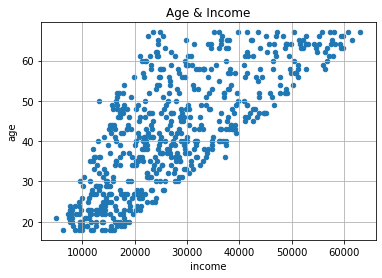

In [230]:
new_table.plot(x="income", y="age", kind="scatter",title="Age & Income", grid=True)

The age and income variables have a significant relationship. They are positively correlated w/each other as it can be seen from the scatter plot. 

9). Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).

Text(0.5, 1.0, 'Income Distribution')

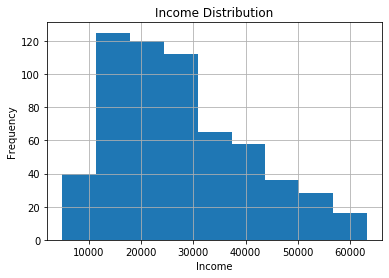

In [231]:
new_table["income"].plot(kind="hist", bins=9, grid=True)
plt.xlabel('Income')
plt.title('Income Distribution')

Text(0.5, 1.0, 'Age Distribution')

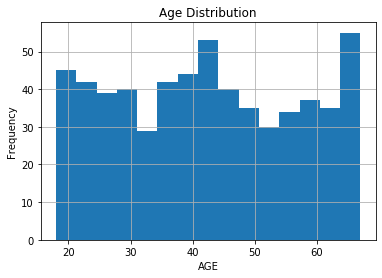

In [232]:
new_table["age"].plot(kind="hist", bins=15, grid=True)
plt.xlabel('AGE')
plt.title('Age Distribution')

10). Using a bargraph, plot the distribution of the values of the region attribute.

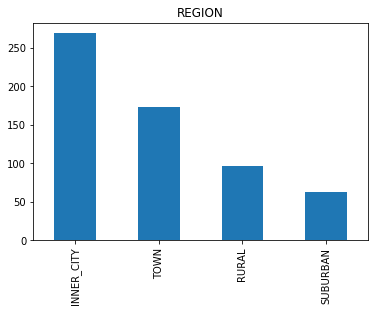

In [234]:
new_table['region'].value_counts().plot(kind='bar', title= "REGION")

11). Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. (Hint: you can either use Numpy or use aggregations fucntions in Pandas such as groupby() and cross-tab().] Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships between these sets of variables. (Hint: This example of creating simple bar charts using Matplotlib may be useful.]

In [236]:
cross_t = pd.crosstab(new_table.region, new_table.pep)
cross_t

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


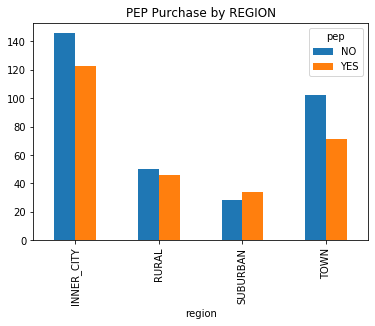

In [238]:
plt.show(cross_t.plot(kind="bar", title="PEP Purchase by REGION"))